In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import cv2 as cv
import random
import os 
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog
from skimage.segmentation import slic

In [2]:
path_train = r"D:\Ki5\Truong_CPV\class_dog_cat\train"
path_test = r'D:\Ki5\Truong_CPV\class_dog_cat\test'

In [3]:
def data(path):
    label = {}
    data = {}
    count = 0
    for i in os.listdir(path):
        file = path + '/' + i
        label[i] = count
        lst = []
        for j in os.listdir(file):
            img_path = file + '/' + j
            img = cv.imread(img_path)
            img = cv.resize(img, (512, 512))
            lst.append(img)
        data[i] = lst
        count += 1
    return data, label

In [4]:
data_train, label_train = data(path_train)
data_test, label_test = data(path_test)

In [5]:
def visualiztion(data):
    plt.figure(figsize=(20, 10))
    lst_name = [i for i in data]
    fx = random.randint(0, len(lst_name) - 1)
    for i in range(16):
        th = random.randint(0, len(data[lst_name[fx]]) - 1)
        plt.subplot(4, 4, i + 1)
        plt.imshow(cv.cvtColor(data[lst_name[fx]][i], cv.COLOR_BGR2RGB))
        plt.title(lst_name[fx])
        plt.axis('off')

In [6]:
def visualiztion_seg(data):
    plt.figure(figsize=(20, 10))
    lst_name = [i for i in data]
    fx = random.randint(0, len(lst_name) - 1)
    for i in range(16):
        th = random.randint(0, len(data[lst_name[fx]]) - 1)
        plt.subplot(4, 4, i + 1)
        plt.imshow((data[lst_name[fx]][i] ))
        plt.title(lst_name[fx])
        plt.axis('off')

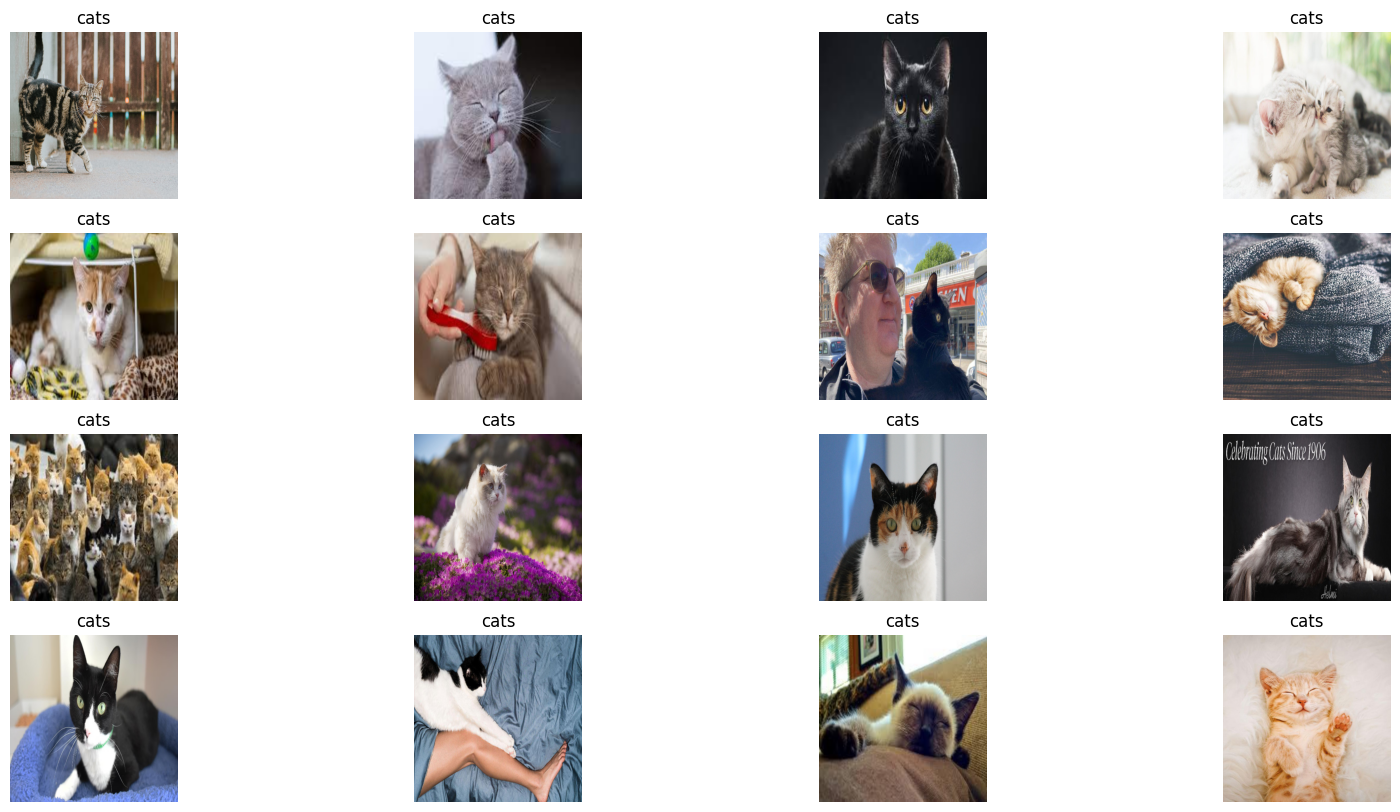

In [7]:
visualiztion(data_train)

In [7]:
def hog_img(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray = cv.GaussianBlur(img, (3, 3), 0.01)
    fg, img = hog(img_gray, orientations= 12, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    img = np.uint8(img)
    return img

In [8]:
def hog_data(data):
    data_ = {}
    for i in data:
        lst = []
        for j in data[i]:
            j = hog_img(j)
            lst.append(j)
        data_[i] = lst
    return data_

In [10]:
def segmentation_img(img):
    img_gray = cv.GaussianBlur(img, (3, 3), 0)
    segmented_img = slic(img_gray, n_segments=1000, compactness=10)

    return segmented_img

In [11]:
def segment_data(data):
    data_ = {}
    for i in data:
        lst = []
        for j in data[i]:
            segmented_img = segmentation_img(j)
            lst.append(segmented_img)
        data_[i] = lst
    return data_

In [12]:
data_train_seg = segment_data(data_train)
data_test_seg = segment_data(data_test)

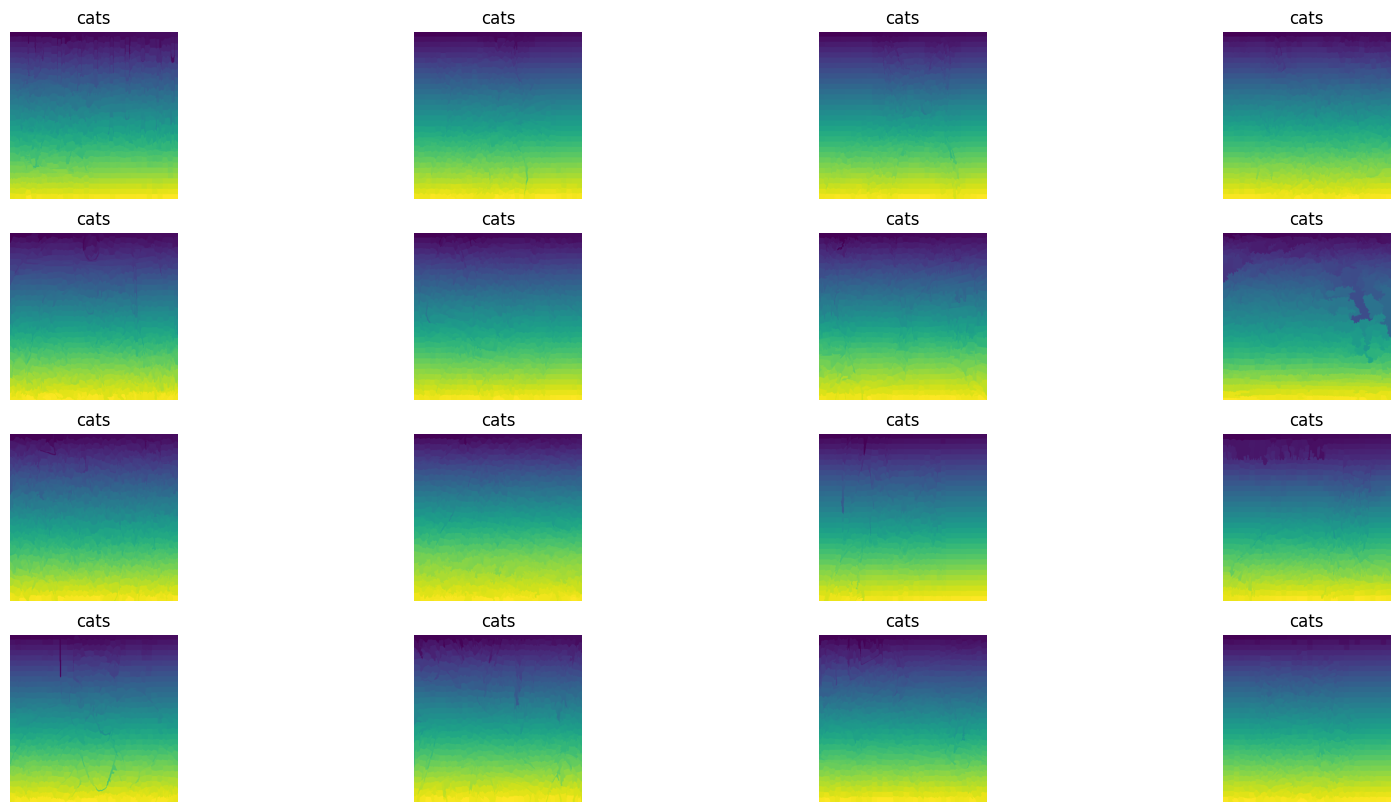

In [13]:
visualiztion_seg(data_train_seg)

In [9]:
data_train_hog = hog_data(data_train)
data_test_hog = hog_data(data_test)

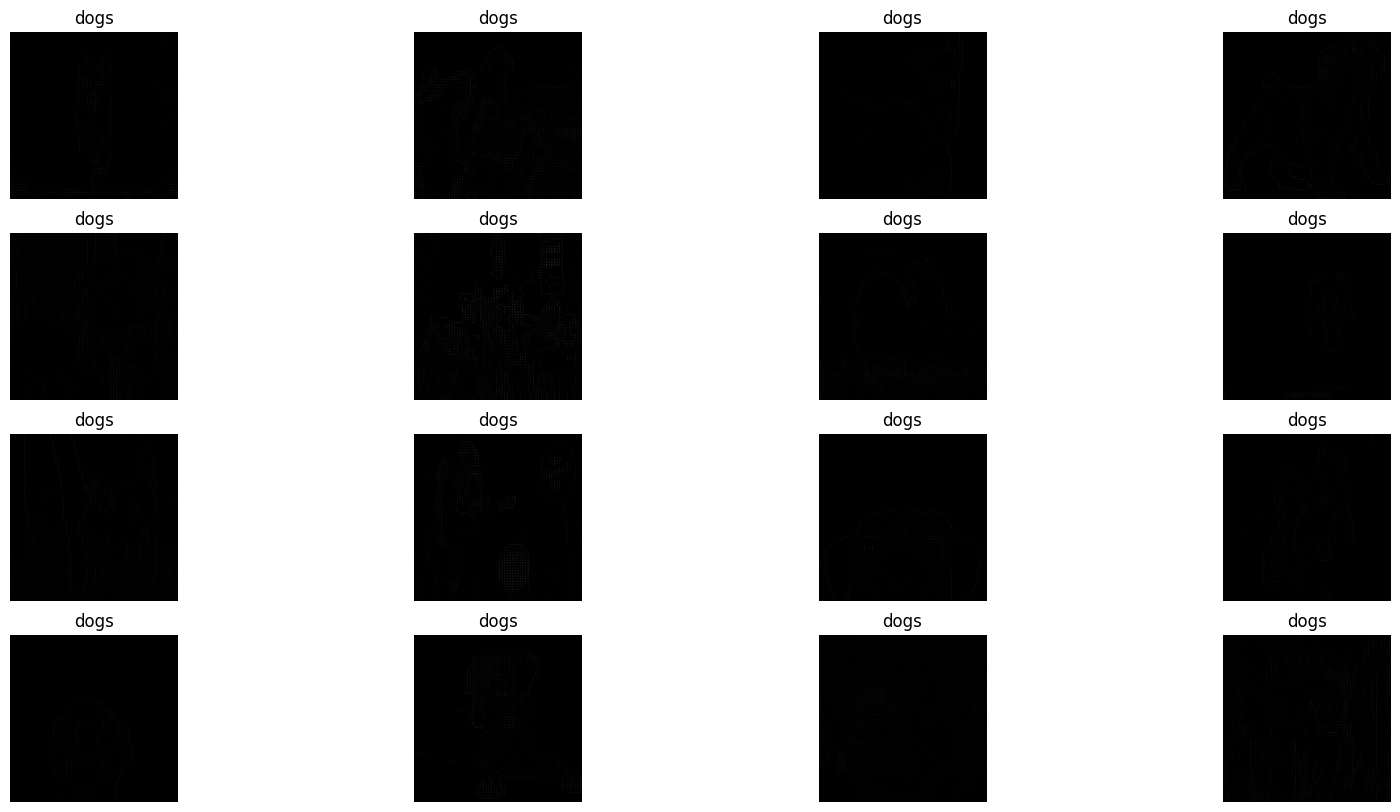

In [10]:
visualiztion(data_train_hog)

In [11]:
def data_label(data, label):
    data_model = []
    label_model = []
    for i in data:
        for j in data[i]:
            j = (j - j.mean()) / j.std()
            j = j.flatten()
            data_model.append(j)
            label_model.append(label[i])
    data_model = np.array(data_model)
    label_model = np.array(label_model)
    data_model = np.concatenate((data_model, label_model[:, None]), axis=1)
    data_model = shuffle(data_model)
    return data_model

In [12]:
data_train_model = data_label(data_train_hog, label_train)
data_test_model = data_label(data_test_hog, label_test)

In [13]:
def train_test_split(data):
    y = data[:, -1]
    X = np.delete(data, -1, 1)
    return X, y

In [14]:
X_train, y_train = train_test_split(data_train_model)
X_test, y_test = train_test_split(data_test_model)

In [15]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

In [16]:
SVC_model = SVC()
grid_search = GridSearchCV(estimator=SVC_model, param_grid= param_grid, cv=5)

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'kernel': ['linear', 'rbf']})

In [18]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}


In [19]:
best_model = grid_search.best_estimator_

In [20]:
y_predict = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

In [21]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 70.00%


In [27]:
SVC_model.fit(X_train, y_train)

SVC()

In [28]:
y_predict_svc = SVC_model.predict(X_test)

In [29]:
accuracy_SVC = accuracy_score(y_test, y_predict_svc)

In [30]:
print("Accuracy: {:.2f}%".format(accuracy_SVC * 100))

Accuracy: 50.00%


In [31]:
def image_vector(image, size=(512, 512)):
    return cv.resize(image, size).flatten()

In [32]:
knn_model = KNeighborsClassifier(n_neighbors= 25, n_jobs=-1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=25)

In [33]:
accuracy_knn = knn_model.score(X_test, y_test)

In [34]:
print("KNN model accuracy: {:.2f}%".format(accuracy_knn * 100))

KNN model accuracy: 57.86%


Test Case 1


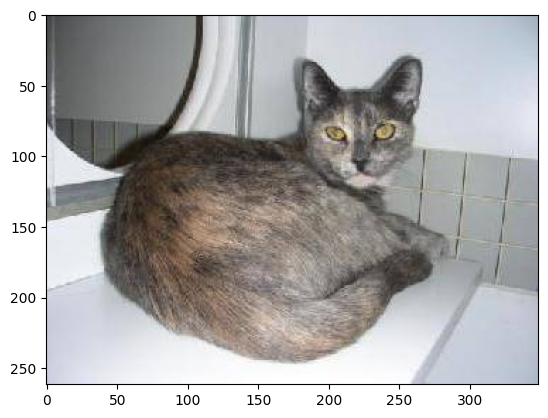

Prediction by SVM - dog
Prediction by KNN - cat
Test Case 2


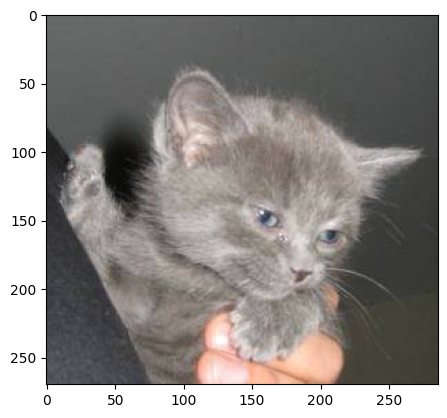

Prediction by SVM - cat
Prediction by KNN - dog
Test Case 3


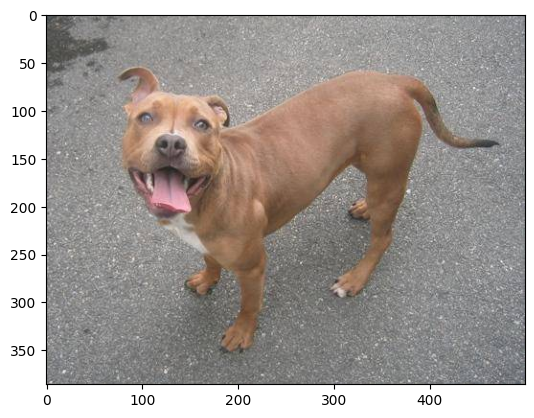

Prediction by SVM - dog
Prediction by KNN - cat
Test Case 4


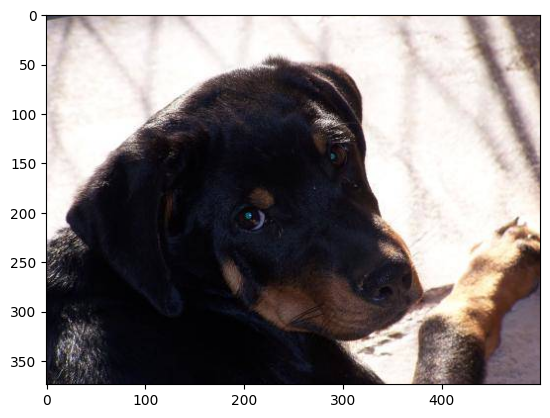

Prediction by SVM - dog
Prediction by KNN - dog
Test Case 5


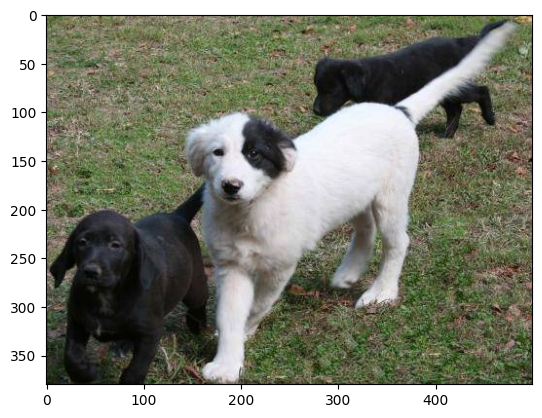

Prediction by SVM - cat
Prediction by KNN - dog
Test Case 6


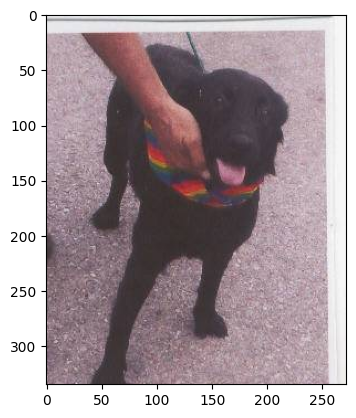

Prediction by SVM - dog
Prediction by KNN - dog
Test Case 7


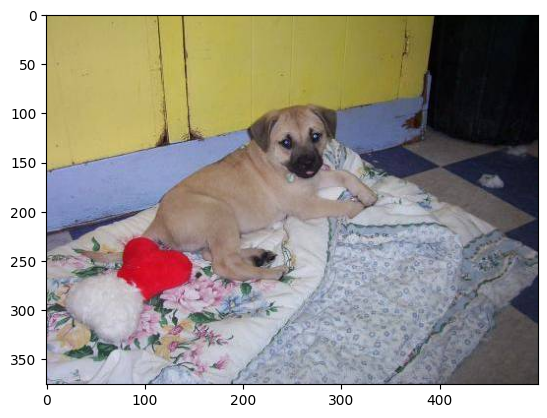

Prediction by SVM - cat
Prediction by KNN - cat
Test Case 8


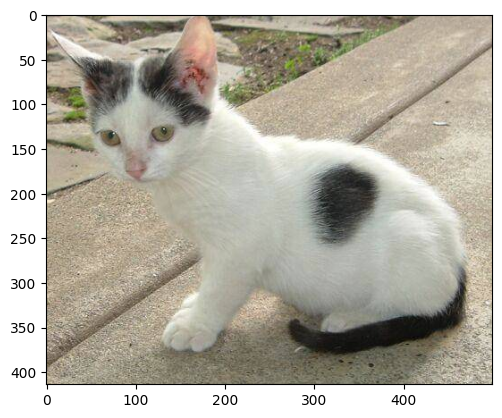

Prediction by SVM - dog
Prediction by KNN - dog
Test Case 9


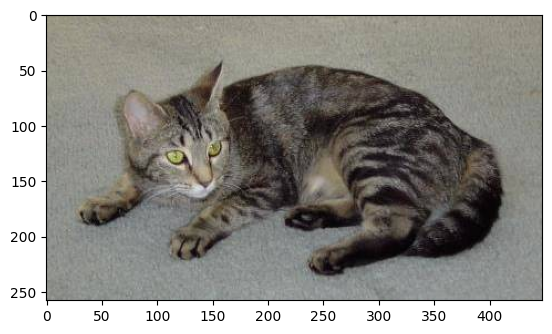

Prediction by SVM - dog
Prediction by KNN - cat
Test Case 10


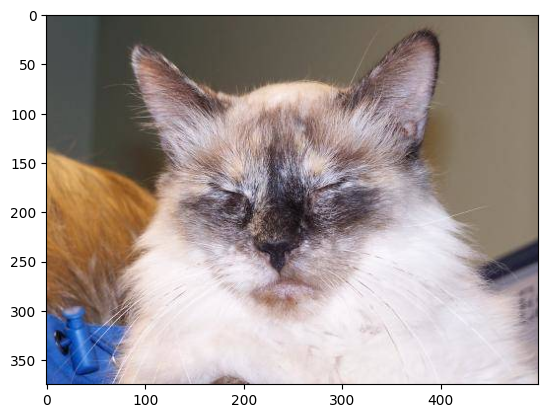

Prediction by SVM - cat
Prediction by KNN - cat


In [36]:
for t in range(1, 11):
    img_path = "D:/Ki5/Truong_CPV/Model/Data/test/case{0}.jpg".format(t)
    img = cv.imread(img_path)
    pixel = image_vector(cv.imread(img_path, 0))
    rawImage = np.array([pixel])
    prediction1 = best_model.predict(rawImage)
    prediction2 = knn_model.predict(rawImage)
    print("Test Case {0}".format(t))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    print("Prediction by SVM - {0}".format("cat" if prediction1[0] == 0 else "dog"))
    print("Prediction by KNN - {0}".format("cat" if prediction2[0] == 0 else "dog"))